In [1]:
import urllib
import numpy as np

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional,Activation
from keras.layers.recurrent import SimpleRNN
from keras.preprocessing.text import Tokenizer
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import adam

Using TensorFlow backend.


In [4]:
with open("C://users//fayca//downloads//ALHAMBRA.txt",encoding='UTF-8') as f:
    text = f.read()

In [8]:
corpus = text.lower().split("\n")

In [245]:
corpus[30:37]

['something of the arabian character. the general insecurity of the',
 'country is evinced in the universal use of weapons. the herdsman in the',
 'field, the shepherd in the plain, has his musket and his knife. the',
 'wealthy villager rarely ventures to the market-town without his trabuco,',
 'and, perhaps, a servant on foot with a blunderbuss on his shoulder; and',
 'the most petty journey is undertaken with the preparation of a warlike',
 'enterprise.']

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [11]:
total_words

11405

In [12]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [13]:
len(input_sequences)

110621

In [14]:
max_sequences_len = max([len(x) for x in input_sequences])
max_sequences_len

19

In [15]:
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequences_len, padding='pre'))

In [16]:
input_sequences[-1]

array([   0,    0,    0,    0,    0,    0,    0,  823,  117,  486,   70,
         44,   23,  192,  247,   95,   42,    2, 1070])

In [17]:
xs = input_sequences[:, :-1]
labels = input_sequences[:,-1]
ys = keras.utils.to_categorical(labels, num_classes=total_words)

In [18]:
corpus[2]

'times with verdure, at other times naked and sunburnt, but he looks'

In [19]:
input_sequences[2]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    6,    1,  817, 2128])

 if we consider this list of tokens as a sentence, then the x is the list up to the last value

In [20]:
xs[2]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   6,   1, 817])

the label is the last value which in this case is 1873

In [21]:
labels[2]

2128

The y is a one-hot encoded array whether length is the size of the corpus of words and the value that is set to one is the one at the index of the label

In [22]:
ys[-1]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [23]:
xs.shape

(110621, 18)

In [44]:
model = Sequential()
model.add(Embedding(total_words, 130,input_length=max_sequences_len-1))
model.add(Bidirectional(LSTM(18)))
model.add(Dense(3500))
model.add(Dense(total_words, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(xs,ys, epochs=100,verbose=1)

C:\Users\fayca\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/100
110621/110621 [==============================] - 123s 1ms/step - loss: 6.3659 - accuracy: 0.1319
Epoch 2/100
110621/110621 [==============================] - 126s 1ms/step - loss: 5.6403 - accuracy: 0.1720
Epoch 3/100
110621/110621 [==============================] - 120s 1ms/step - loss: 5.2011 - accuracy: 0.1974
Epoch 4/100
110621/110621 [==============================] - 119s 1ms/step - loss: 4.8510 - accuracy: 0.2185
Epoch 5/100
110621/110621 [==============================] - 119s 1ms/step - loss: 4.5756 - accuracy: 0.2380
Epoch 6/100
110621/110621 [==============================] - 120s 1ms/step - loss: 4.3488 - accuracy: 0.2559
Epoch 7/100
110621/110621 [==============================] - 123s 1ms/step - loss: 4.1571 - accuracy: 0.2738
Epoch 8/100
110621/110621 [==============================] - 122s 1ms/step - loss: 3.9852 - accuracy: 0.2904
Epoch 9/100
110621/110621 [==============================] - 121s 1ms/step - loss: 3.8306 - accuracy: 0.3057
Epoch 10/100
110621

110621/110621 [==============================] - 121s 1ms/step - loss: 1.1536 - accuracy: 0.7356
Epoch 76/100
110621/110621 [==============================] - 122s 1ms/step - loss: 1.1388 - accuracy: 0.7388
Epoch 77/100
110621/110621 [==============================] - 122s 1ms/step - loss: 1.1314 - accuracy: 0.7404
Epoch 78/100
110621/110621 [==============================] - 120s 1ms/step - loss: 1.1238 - accuracy: 0.7423
Epoch 79/100
110621/110621 [==============================] - 120s 1ms/step - loss: 1.1191 - accuracy: 0.7434
Epoch 80/100
110621/110621 [==============================] - 120s 1ms/step - loss: 1.1081 - accuracy: 0.7461
Epoch 81/100
110621/110621 [==============================] - 120s 1ms/step - loss: 1.0977 - accuracy: 0.7487
Epoch 82/100
110621/110621 [==============================] - 120s 1ms/step - loss: 1.0872 - accuracy: 0.7503
Epoch 83/100
110621/110621 [==============================] - 122s 1ms/step - loss: 1.0848 - accuracy: 0.7516
Epoch 84/100
110621/110

In [45]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

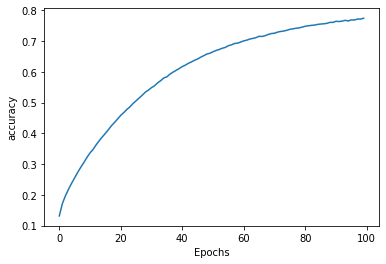

In [46]:
plot_graphs(history, 'accuracy')

In [236]:
seed_text ="the most"

In [237]:
token_list = tokenizer.texts_to_sequences([seed_text])[0]
token_list = pad_sequences([token_list], maxlen = max_sequences_len-1, padding='pre')


In [238]:
token_list

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1, 78]])

In [239]:
predicted = model.predict_classes(token_list, verbose=0)

In [240]:
for word, index in tokenizer.word_index.items():
    if index == predicted:
        output_word = word
        break
seed_text += " " + output_word

In [241]:
print(seed_text)

the most interesting


In [242]:
next_words = 8

for _ in range(next_words):
    token_list = token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen = max_sequences_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = " "
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

the most interesting member of this family group in my eyes
